In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append(r'/home/brandon/Documents/Code/diptericin-paper')
from diptericin_paper_utils import fontsize, dpt, colors
import matplotlib as mpl
import pickle


In [2]:
#%matplotlib qt
%matplotlib inline

In [3]:
colors

{'no_inj': [0.8, 0.8, 0.8],
 'mock': [0.4, 0.4, 0.4],
 'e.coli': [0, 0.4, 0],
 'complete': [0, 0.8, 0],
 'bacteria': [0.8, 0, 0.8],
 'dye': array([0.8       , 0.33333333, 0.        ])}

In [4]:
fontsize = 24
dpt = '$dptA$'
linewidth = 4
def style_axes(ax, fontsize=24, labelsize=None):
    if labelsize is None:
        labelsize=fontsize
    plt.minorticks_off()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.xaxis.set_tick_params(labelsize=20)
    ax.yaxis.set_tick_params(labelsize=20)
    for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_fontsize(fontsize)
    for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontsize(fontsize)
#     plt.tight_layout()
    
    return ax
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['axes.linewidth'] = linewidth

In [5]:
"""insert path to the folder of all data files here"""
path_to_supplemental_data_files = r'/home/brandon/Documents/Code/diptericin-paper/SupplementalDataFiles_revision'

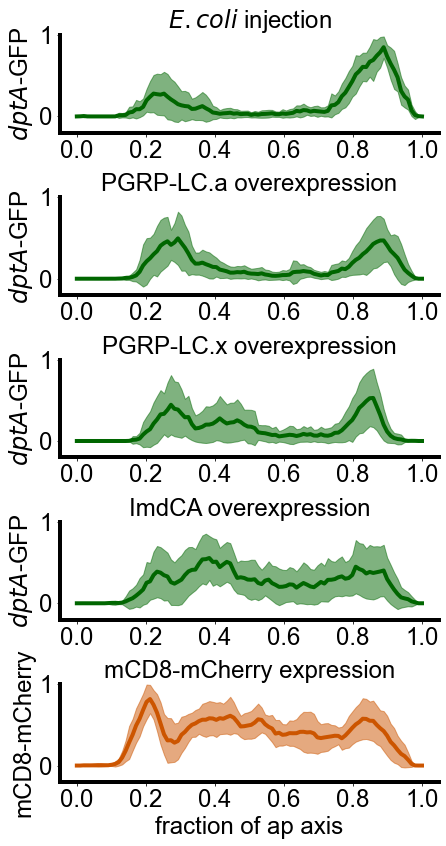

In [6]:
"""plot all distributions on one stacked graph"""

# normalize the distributions to their max value
normalize = True

# options for color schemes. I went with "constant" for the paper
coloring = 'constant' # or 'sequential'

if coloring == 'sequential':
    """for sequential coloring"""
    reds = np.linspace(colors['e.coli'][0], colors['bacteria'][0], 5)
    greens = np.linspace(colors['e.coli'][1], colors['bacteria'][1], 5)
    blues = np.linspace(colors['e.coli'][2], colors['bacteria'][2], 5)
elif coloring == 'discrete':
    """for discrete coloring"""
    cmap = mpl.colormaps['Dark2']
    x = np.linspace(0, 1, 8)
    cmap_rgbs = cmap(x)
    cmap_rgbs[4] = np.concatenate((colors['e.coli'], [1.,]))
    cmap_rgbs[3] = np.concatenate((colors['bacteria'], [1.,]))
    color_indices = [4, 0, 2, 6, 1]
elif coloring == 'constant':
    """have the plot line colors reflect what's being quantified, and the titles reflect the perturbation"""
    
else:
    raise ValueError

"""load the data"""
with open(path_to_supplemental_data_files + '/Fig5/mcd8-mcherry', 'rb') as file:
    line_dists_mcd8_red = pickle.load(file)

with open(path_to_supplemental_data_files + '/Fig5/pgrp-lcx', 'rb') as file:
    line_dists_lcx = pickle.load(file)
    
with open(path_to_supplemental_data_files + '/Fig5/pgrp-lca', 'rb') as file:
    line_dists_lca = pickle.load(file)
    
with open(path_to_supplemental_data_files + '/Fig5/imdca', 'rb') as file:
    line_dists_imd = pickle.load(file)
    
with open(path_to_supplemental_data_files + '/Fig5/ecoli', 'rb') as file:
    line_dists_ecoli = pickle.load(file)
    
all_line_dists = [line_dists_ecoli, line_dists_lca, line_dists_lcx, line_dists_imd, line_dists_mcd8_red]

titles = ['$E. coli$ injection', 'PGRP-LC.a overexpression', 'PGRP-LC.x overexpression', 'ImdCA overexpression', 'mCD8-mCherry expression']
counter = 0
fig, axs = plt.subplots(5, 1, figsize=(6.4 , 11.85))
for i in range(axs.shape[0]):
    line_dists = all_line_dists[counter]
    if len(line_dists) > 0:
        if normalize:
            for k in range(line_dists.shape[0]):
                line_dists[k] = line_dists[k] / np.clip(np.max(line_dists[k]), a_min=1, a_max=np.inf)

        x = np.linspace(0, 1, line_dists.shape[1])
        m = np.mean(line_dists, axis=0)
        s = np.std(line_dists, axis=0) #/ np.sqrt(len(line_dists))
        l = m - s
        u = m + s
        ax = axs[i]
        if coloring == 'sequential':
            this_color = [reds[counter], greens[counter], blues[counter]]
        elif coloring == 'discrete':
            this_color = cmap_rgbs[color_indices[counter]]
        elif coloring == 'constant':
            if i == 4:
                this_color = colors['dye']
            else:
                this_color = colors['e.coli']
        else:
            raise ValueError
        ax.fill_between(x, l, u, color=this_color, alpha=0.5)
        ax.plot(x, m, linewidth=4, color=this_color)
        ax.set_title(f'{titles[counter]}', fontsize=fontsize)

        if counter == 4:
            ax.set_xlabel('fraction of ap axis', fontsize=fontsize)
       
        ax.set_ylabel(f'{dpt}-GFP', fontsize=fontsize)
        if counter == 4:
            ax.set_ylabel(f'mCD8-mCherry', fontsize=fontsize)
        ax.set_ylim([-0.2, 1])
        ax = style_axes(ax, fontsize=fontsize)
    counter += 1
fig.tight_layout()

In [64]:
#plt.savefig(r'/home/brandon/Documents/Code/diptericin-paper/figures/overexpression_fig/overexpression_ap_dists_constant_colors.pdf')

In [ ]:
"""Code for generating the 1D distributions. making these images publically availabe is in progress."""
# red channel membrane
signal_thresh = 700
larvae_thresh = 230
line_dists_mcd8_red = compute_all_line_dists(mcd8_red_paths, larvae_thresh=larvae_thresh, signal_thresh=signal_thresh, short_axis=1)

# green channel dpt-gfp
signal_thresh = 900
larvae_thresh = 170
line_dists_lcx = compute_all_line_dists(lcx_paths, larvae_thresh=larvae_thresh, signal_thresh=signal_thresh, short_axis=1)
line_dists_lca = compute_all_line_dists(lca_paths, larvae_thresh=larvae_thresh, signal_thresh=signal_thresh, short_axis=1)
line_dists_imd = compute_all_line_dists(imd_paths, larvae_thresh=larvae_thresh, signal_thresh=signal_thresh, short_axis=1)
line_dists_ecoli = compute_all_line_dists(ecoli_paths, larvae_thresh=larvae_thresh, signal_thresh=signal_thresh, short_axis=1)
